<a href="https://colab.research.google.com/github/GbrBrasil/bibliotecaPandas/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip help
!pip install sidetable
!pip install pandas-profiling==3.3.0


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [3]:
import matplotlib
print(matplotlib.__version__)

3.5.3


In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [5]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [6]:
def list_attributes(obj):
  """Lista atributos e funções de um objeto"""
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

In [7]:
# Read titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [8]:
import matplotlib

In [9]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df[df.duplicated(keep=False)]

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
4           0       3    male  35.0      0      0   8.0500        S   Third   
26          0       3    male   NaN      0      0   7.2250        C   Third   
28          1       3  female   NaN      0      0   7.8792        Q   Third   
29          0       3    male   NaN      0      0   7.8958        S   Third   
32          1       3  female   NaN      0      0   7.7500        Q   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male   NaN      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male deck  embark_town alive  alone  
4      man        True  NaN  Southampton    no   True  
26     man        True  NaN    Cherbourg    no   True  
28   woman       False  NaN   Queenstown   yes   True  
29     man        True  NaN  Southampton    no   True  
32   woman       False  NaN   Queenstown   yes   True  
..     ...         ...  ...          ...   ...    ...  
870    man        True  NaN  Southampton    no   True  
877    man        True  NaN  Southampton    no   True  
878    man        True  NaN  Southampton    no   True  
884    man        True  NaN  Southampton    no   True  
886    man        True  NaN  Southampton    no   True  

[160 rows x 15 columns]

In [11]:
(
    df
    .groupby(df.columns.tolist(), dropna = False)
    .size()
    .to_frame('n_duplicates')
    .query('n_duplicates>1')
    .sort_values('n_duplicates',ascending=False)
    .head(5)
)

n_duplicates
survived pclass sex    age sibsp parch fare   embarked class  who   adult_male deck embark_town alive alone              
0        3      male   NaN 0     0     7.8958 S        Third  man   True       NaN  Southampton no    True             13
                                       8.0500 S        Third  man   True       NaN  Southampton no    True             12
                                       7.7500 Q        Third  man   True       NaN  Queenstown  no    True              8
1        3      female NaN 0     0     7.7500 Q        Third  woman False      NaN  Queenstown  yes   True              7
0        2      male   NaN 0     0     0.0000 S        Second man   True       NaN  Southampton no    True              6

In [12]:
df.drop_duplicates()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female   NaN      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
885  woman       False  NaN   Queenstown    no  False  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[784 rows x 15 columns]

In [13]:
df_missing =(
    df.isna().sum()
    .to_frame('missing_count')
    .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
    .sort_values('missing_count', ascending=False)
)
df_missing.style.format('{:.2%}', subset='missing_pct')

In [14]:
df.isna().sum().to_frame('missing_count').assign(missing_pct = lambda x: x.div(len(df))).sort_values('missing_count', ascending = False)

missing_count  missing_pct
deck                   688     0.772166
age                    177     0.198653
embarked                 2     0.002245
embark_town              2     0.002245
survived                 0     0.000000
pclass                   0     0.000000
sex                      0     0.000000
sibsp                    0     0.000000
parch                    0     0.000000
fare                     0     0.000000
class                    0     0.000000
who                      0     0.000000
adult_male               0     0.000000
alive                    0     0.000000
alone                    0     0.000000

In [15]:
df.stb.missing()

missing  total    percent
deck             688    891  77.216611
age              177    891  19.865320
embarked           2    891   0.224467
embark_town        2    891   0.224467
survived           0    891   0.000000
pclass             0    891   0.000000
sex                0    891   0.000000
sibsp              0    891   0.000000
parch              0    891   0.000000
fare               0    891   0.000000
class              0    891   0.000000
who                0    891   0.000000
adult_male         0    891   0.000000
alive              0    891   0.000000
alone              0    891   0.000000

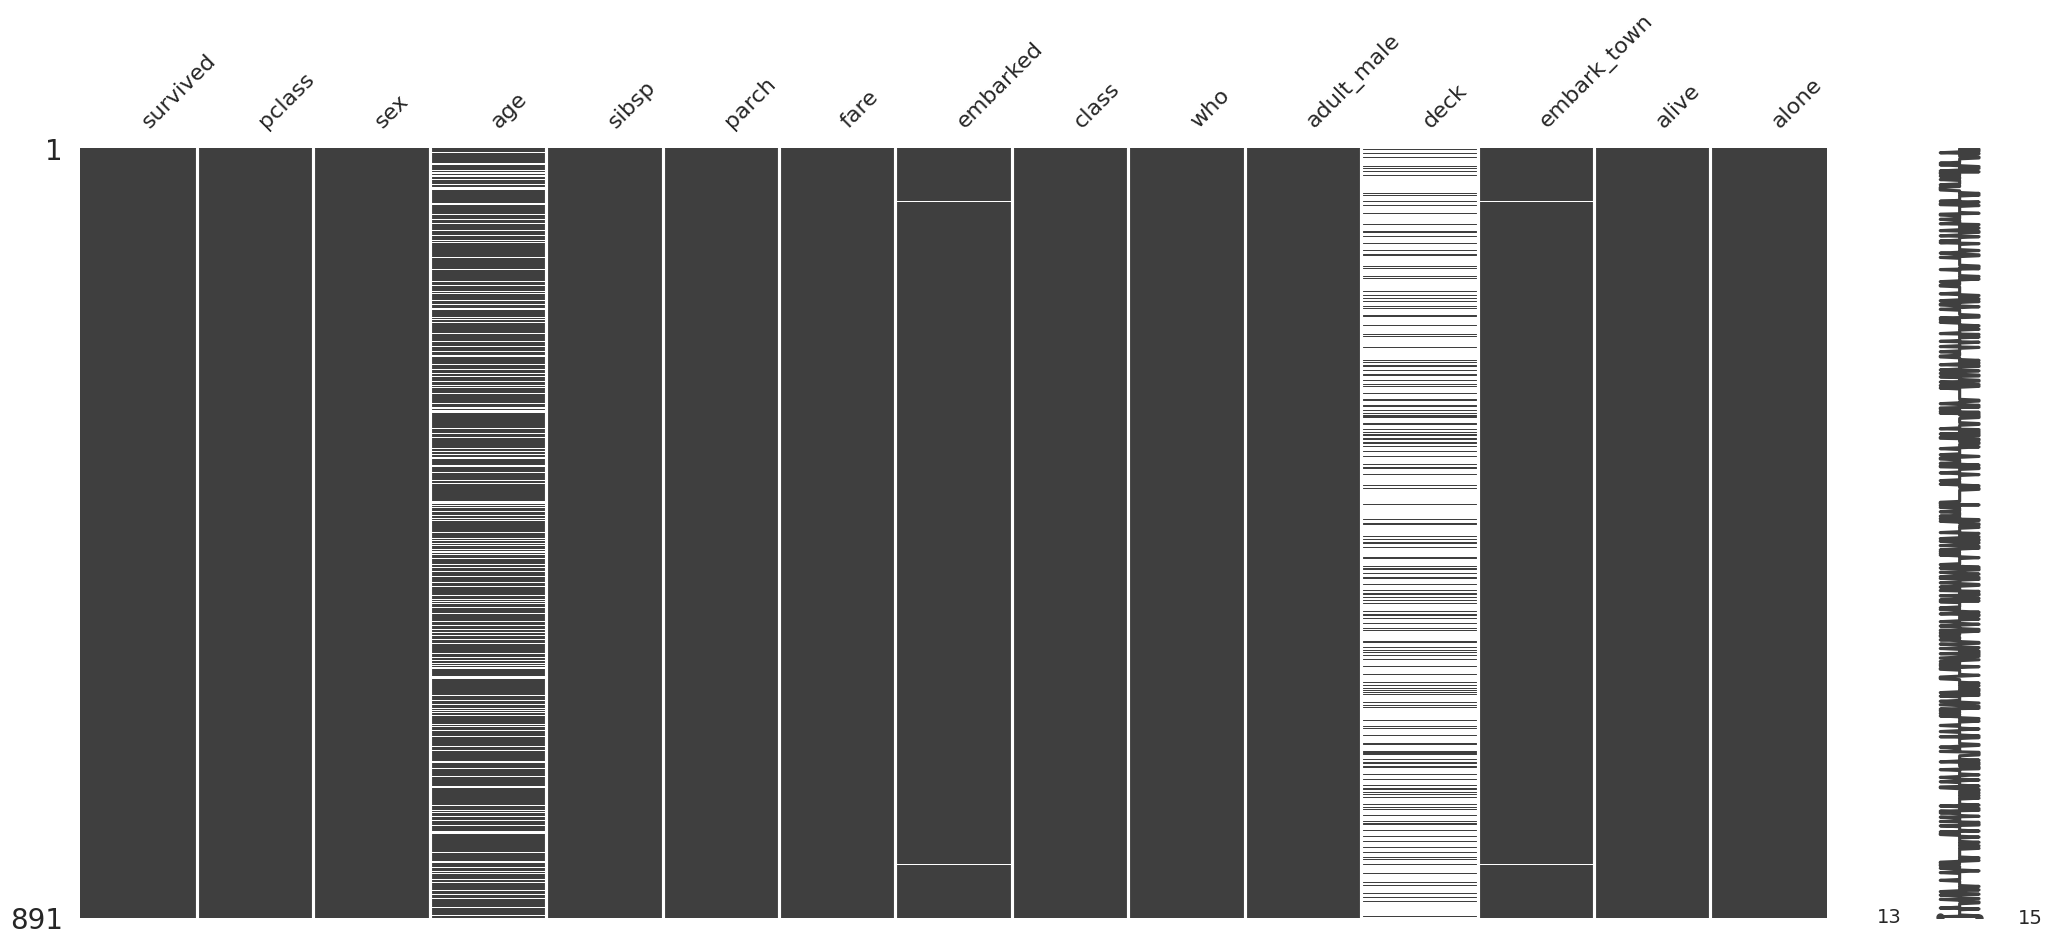

In [16]:
msno.matrix(df);

In [17]:
df[df.isna().any(axis=1)]

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
2           1       3  female  26.0      0      0   7.9250        S   Third   
4           0       3    male  35.0      0      0   8.0500        S   Third   
5           0       3    male   NaN      0      0   8.4583        Q   Third   
7           0       3    male   2.0      3      1  21.0750        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
884         0       3    male  25.0      0      0   7.0500        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
888         0       3  female   NaN      1      2  23.4500        S   Third   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
2    woman       False  NaN  Southampton   yes   True  
4      man        True  NaN  Southampton    no   True  
5      man        True  NaN   Queenstown    no   True  
7    child       False  NaN  Southampton    no  False  
..     ...         ...  ...          ...   ...    ...  
884    man        True  NaN  Southampton    no   True  
885  woman       False  NaN   Queenstown    no  False  
886    man        True  NaN  Southampton    no   True  
888  woman       False  NaN  Southampton    no  False  
890    man        True  NaN   Queenstown    no   True  

[709 rows x 15 columns]

In [18]:
df[df.embarked.isna()]

survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  
61   woman       False    B         NaN   yes   True  
829  woman       False    B         NaN   yes   True

In [19]:
df.drop(columns=['deck'])

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  
0      man        True  Southampton    no  False  
1    woman       False    Cherbourg   yes  False  
2    woman       False  Southampton   yes   True  
3    woman       False  Southampton   yes  False  
4      man        True  Southampton    no   True  
..     ...         ...          ...   ...    ...  
886    man        True  Southampton    no   True  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True  

[891 rows x 14 columns]

In [20]:
max_nan_freq = .7

na_cols = df.isna().sum().div(len(df))
cols2drop = na_cols[na_cols>max_nan_freq].index

df.drop(columns = cols2drop)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  
0      man        True  Southampton    no  False  
1    woman       False    Cherbourg   yes  False  
2    woman       False  Southampton   yes   True  
3    woman       False  Southampton   yes  False  
4      man        True  Southampton    no   True  
..     ...         ...          ...   ...    ...  
886    man        True  Southampton    no   True  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True  

[891 rows x 14 columns]

In [21]:
df.drop(columns = cols2drop,inplace = True)

In [22]:
df.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male  embark_town alive  alone  
886    man        True  Southampton    no   True  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True

In [23]:
df.fillna({'age': df.age.mean(),'embarked': df.embarked.mode()[0]}).tail()

survived  pclass     sex        age  sibsp  parch   fare embarked  \
886         0       2    male  27.000000      0      0  13.00        S   
887         1       1  female  19.000000      0      0  30.00        S   
888         0       3  female  29.699118      1      2  23.45        S   
889         1       1    male  26.000000      0      0  30.00        C   
890         0       3    male  32.000000      0      0   7.75        Q   

      class    who  adult_male  embark_town alive  alone  
886  Second    man        True  Southampton    no   True  
887   First  woman       False  Southampton   yes   True  
888   Third  woman       False  Southampton    no  False  
889   First    man        True    Cherbourg   yes   True  
890   Third    man        True   Queenstown    no   True

In [24]:
(
  df
  .assign(
      age_bfill = df.age.bfill(),
      age_fill = df.age.ffill(),
      age_interpolate = df.age.interpolate()
  )
.filter(like='age')
.tail()
.style.highlight_null('yellow')
)

In [25]:
df.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [26]:
df,_ = datasets.load_wine(return_X_y=True, as_frame=True)
print(df.shape)
df.head()

(178, 13)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

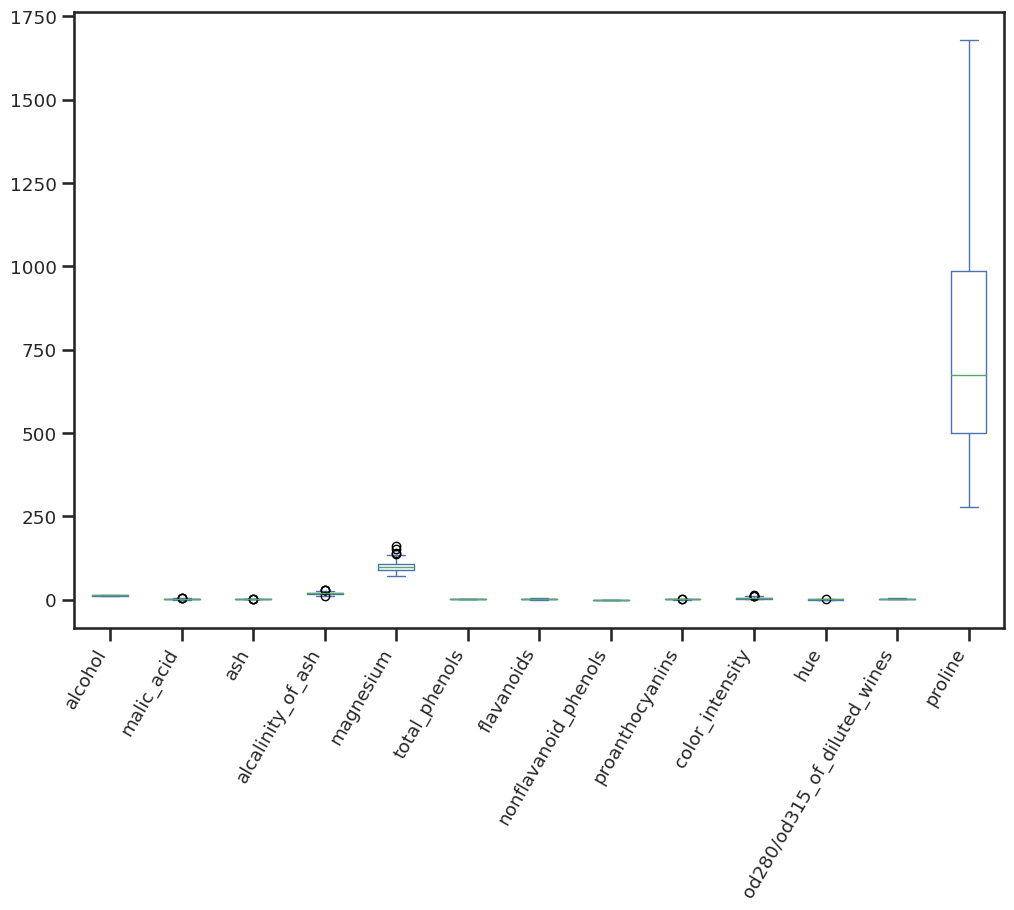

In [27]:
df.plot.box()
plt.xticks(rotation=60,ha='right');

In [28]:
from sklearn.preprocessing import scale

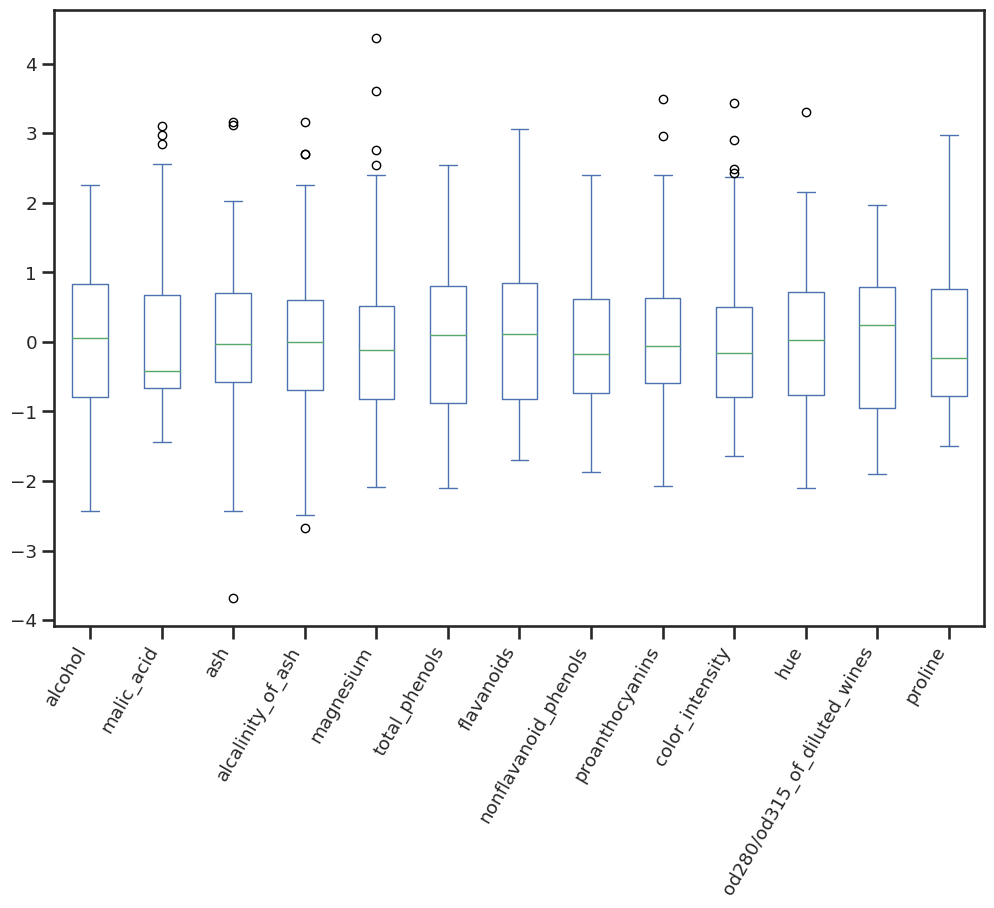

In [29]:
df.apply(scale).plot.box()
plt.xticks(rotation=60,ha='right');

In [30]:
def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [31]:
is_outlier(df.ash).sum()

3

In [32]:
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [33]:
df[~df.apply(is_outlier).any(axis=1)]

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
172    14.16        2.51  2.48               20.0       91.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
172        0.70                  0.44             1.24             9.70  0.62   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
172                          1.71    660.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[161 rows x 13 columns]

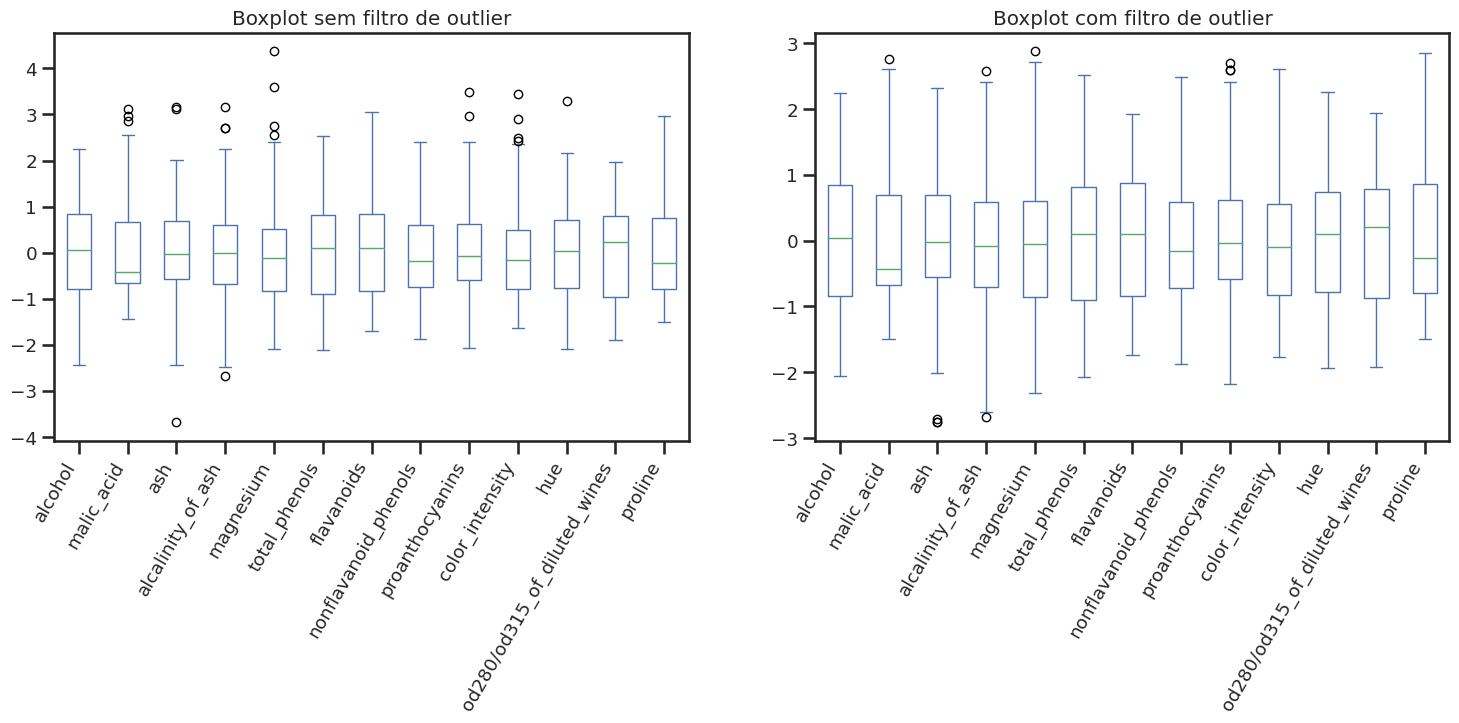

In [34]:
df_withount_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_withount_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

fig.autofmt_xdate(rotation=60,ha='right')

plt.show()

In [35]:
def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array<-3) | (scaled_array>3)

df_without_outliers = df[~df.apply(zscore_outlier).any(axis=1)]

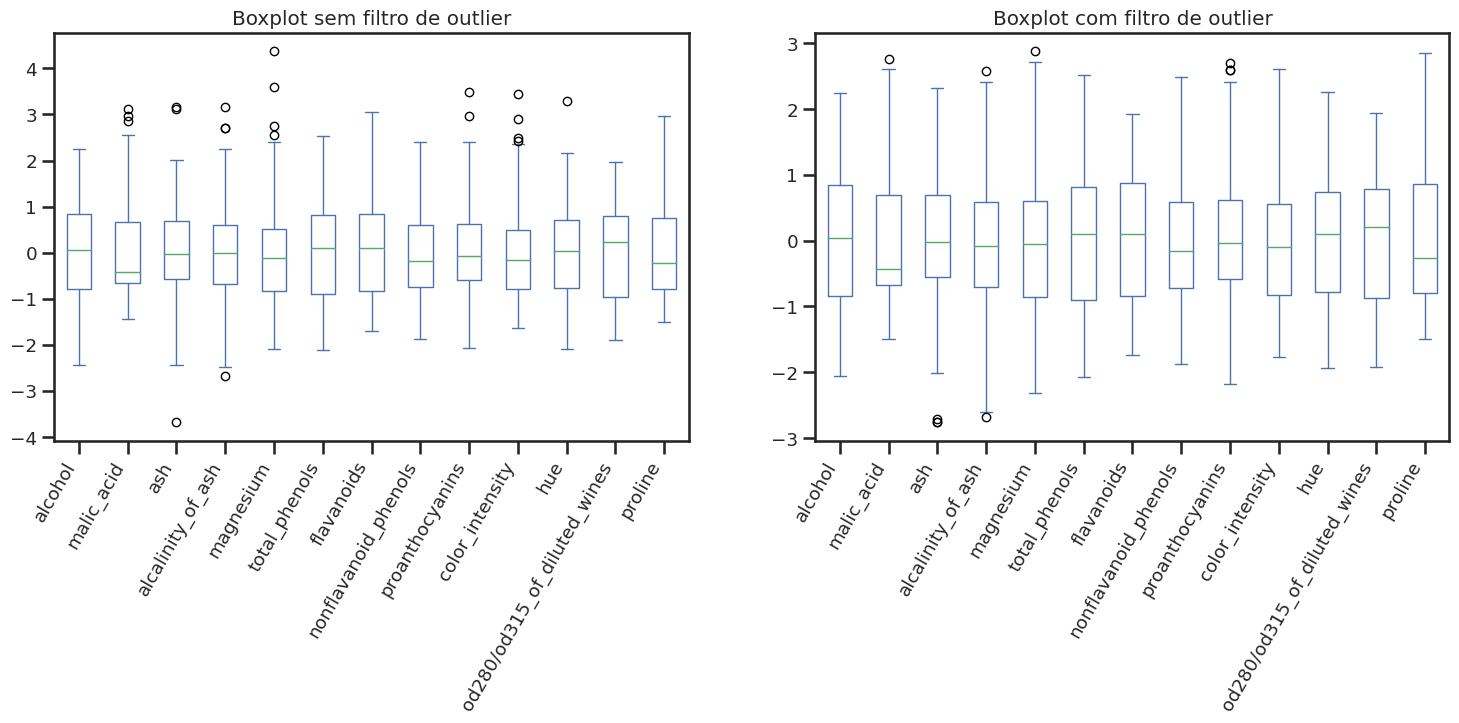

In [36]:


fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_withount_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

fig.autofmt_xdate(rotation=60,ha='right')

plt.show()

In [37]:
df.describe(percentiles=[.01,.25,.5,.75,.9,.99])

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
1%      11.440800    0.897700    1.700000          11.354000   78.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
90%     14.100000    3.983000    2.700000          24.000000  118.000000   
99%     14.472800    5.542200    2.989000          28.500000  141.760000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
1%          1.138500    0.470000              0.140000         0.420000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
90%         3.044000    3.233000              0.530000         2.305000   
99%         3.595900    3.791400              0.630000         3.033600   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
1%            1.863200    0.547700                      1.290000   306.940000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
90%           8.530000    1.233000                      3.456000  1261.500000  
99%          11.018500    1.426900                      3.843000  1522.360000  
max          13.000000    1.710000                      4.000000  1680.000000

In [38]:
def cap_values(array, lower_quantile=0., upper_quantile=1.):
  array = array.copy()

  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)

  array[array<lower_quantile] = lower_quantile
  array[array>upper_quantile] = upper_quantile

  return array

In [39]:
cap_values(df.ash,upper_quantile=.90).max()

2.7

In [40]:
df.apply(cap_values, upper_quantile=.99).describe(percentiles=[.01,.25,.5,.75,.9,.99])

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    12.997054    2.334294    2.363865          19.486517   99.575955   
std      0.804575    1.111002    0.267036           3.314706   13.680946   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
1%      11.440800    0.897700    1.700000          11.354000   78.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
90%     14.100000    3.983000    2.700000          24.000000  118.000000   
99%     14.409044    5.517406    2.935870          28.500000  139.634800   
max     14.472800    5.542200    2.989000          28.500000  141.760000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.292089    2.021252              0.361685         1.586445   
std         0.618829    0.979667              0.124067         0.559125   
min         0.980000    0.340000              0.130000         0.410000   
1%          1.138500    0.470000              0.140000         0.420000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
90%         3.044000    3.233000              0.530000         2.305000   
99%         3.537457    3.759522              0.630000         2.976928   
max         3.595900    3.791400              0.630000         3.033600   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.042848    0.955729                      2.610371   745.869213  
std           2.272948    0.223969                      0.707571   312.129198  
min           1.280000    0.480000                      1.270000   278.000000  
1%            1.863200    0.547700                      1.290000   306.940000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
90%           8.530000    1.233000                      3.456000  1261.500000  
99%          10.850255    1.421587                      3.825290  1516.692800  
max          11.018500    1.426900                      3.843000  1522.360000

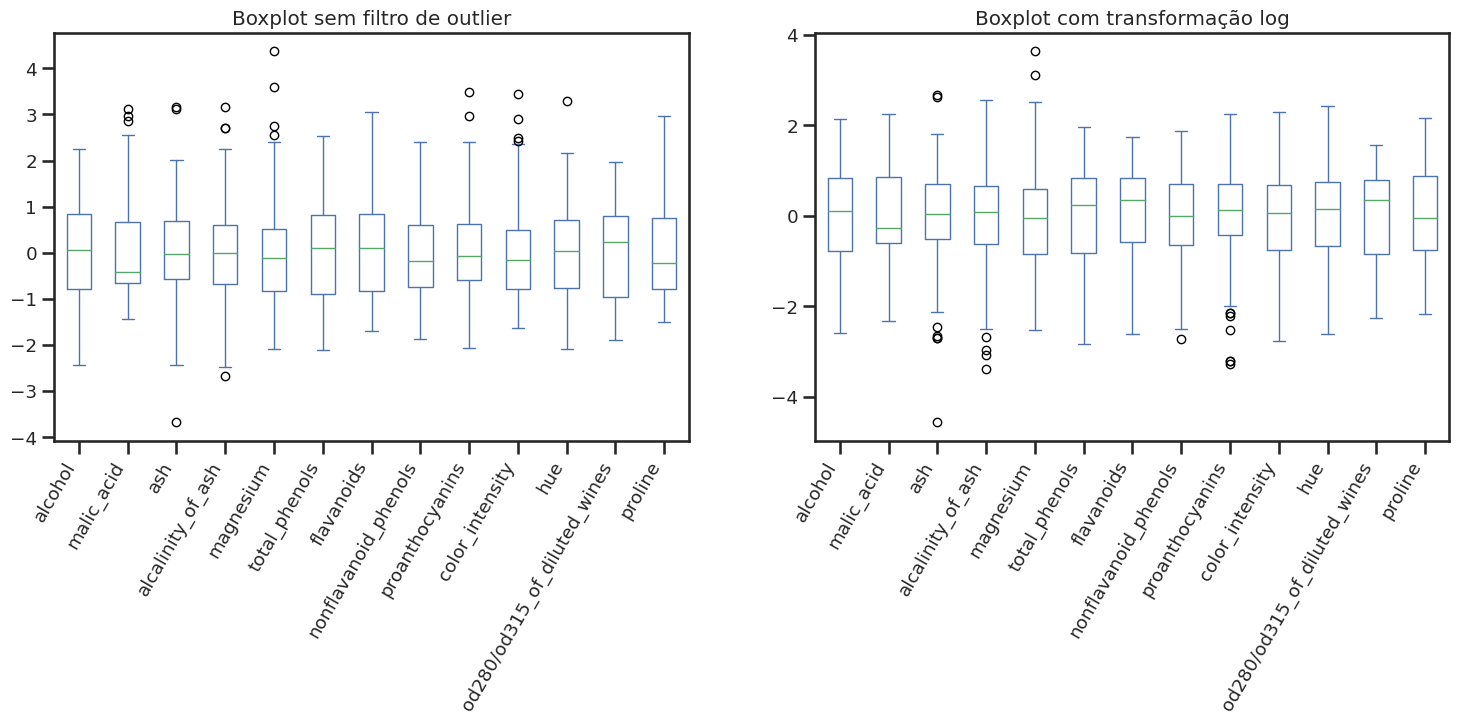

In [41]:

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df.apply(np.log).apply(scale).plot.box(ax=axes[1], title='Boxplot com transformação log')

fig.autofmt_xdate(rotation=60,ha='right')

plt.show()

In [42]:
from sklearn.preprocessing import power_transform

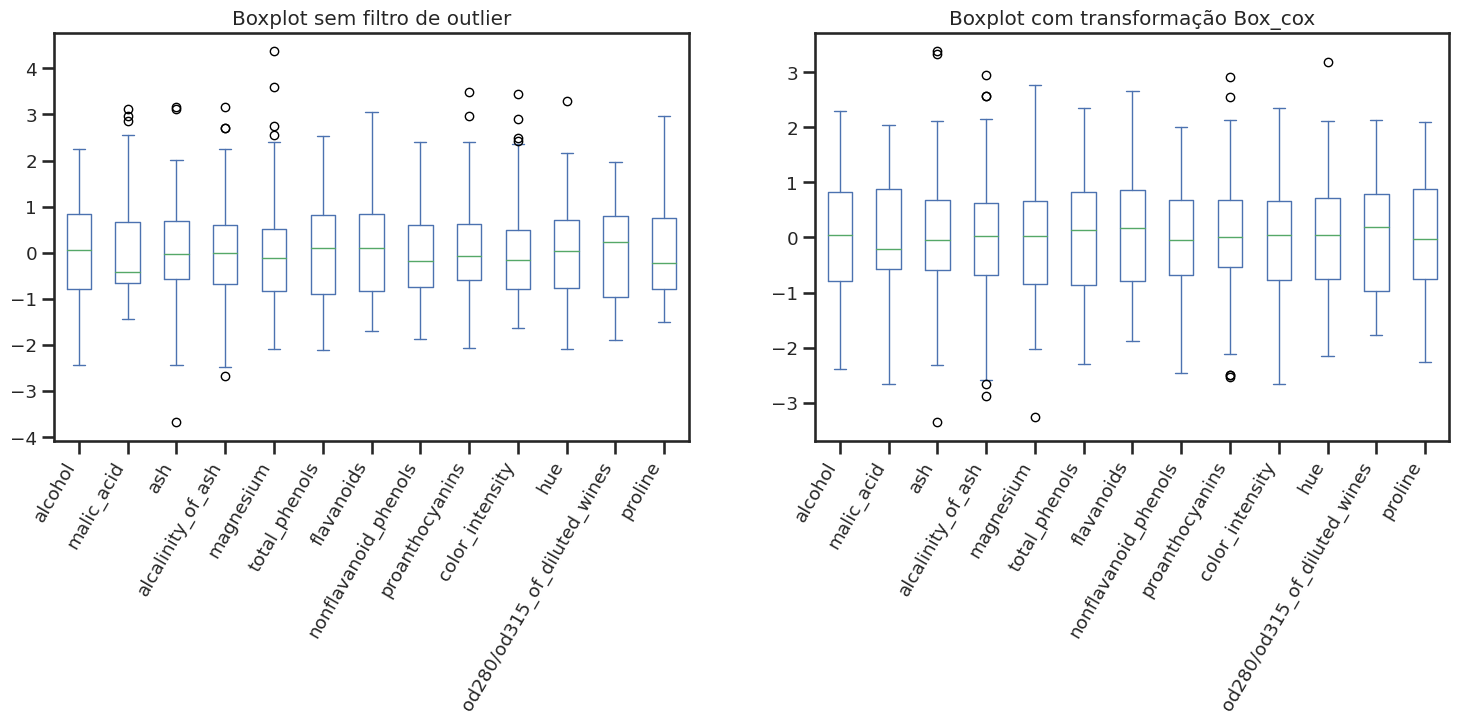

In [43]:
df_box_cox = pd.DataFrame(power_transform(df,method='box-cox'), columns=df.columns)

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_box_cox.plot.box(ax=axes[1], title='Boxplot com transformação Box_cox')

fig.autofmt_xdate(rotation=60,ha='right')

plt.show()

In [44]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities']).dropna()
print(df.shape)
df.head()

(5256, 2)


Date  Fatalities
0  09/17/1908         1.0
1  07/12/1912         5.0
2  08/06/1913         1.0
3  09/09/1913        14.0
4  10/17/1913        30.0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5256 non-null   object 
 1   Fatalities  5256 non-null   float64
dtypes: float64(1), object(1)
memory usage: 252.2+ KB


In [46]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date']).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [47]:
df.head()

Date  Fatalities
0 1908-09-17         1.0
1 1912-07-12         5.0
2 1913-08-06         1.0
3 1913-09-09        14.0
4 1913-10-17        30.0

In [48]:
df['Date'].astype('datetime64[ns]')

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [49]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [50]:
df['Date'].dt.day_name()

0        Thursday
1          Friday
2       Wednesday
3         Tuesday
4          Friday
          ...    
5263    Wednesday
5264      Tuesday
5265       Monday
5266       Sunday
5267       Monday
Name: Date, Length: 5256, dtype: object

In [51]:
df_index = df.set_index('Date').sort_index()
df_index

Fatalities
Date                  
1908-09-17         1.0
1912-07-12         5.0
1913-08-06         1.0
1913-09-09        14.0
1913-10-17        30.0
...                ...
2009-05-20        98.0
2009-05-26         4.0
2009-06-01       228.0
2009-06-07         1.0
2009-06-08        13.0

[5256 rows x 1 columns]

In [52]:
df_index.loc['2001-09-11':'2002']

Fatalities
Date                  
2001-09-11        44.0
2001-09-11        64.0
2001-09-11        92.0
2001-09-11        65.0
2001-09-12        19.0
...                ...
2002-12-21         2.0
2002-12-23        44.0
2002-12-25         1.0
2002-12-26         3.0
2002-12-27         1.0

[105 rows x 1 columns]

In [53]:
df_index.resample('YS').sum()

Fatalities
Date                  
1908-01-01         1.0
1909-01-01         0.0
1910-01-01         0.0
1911-01-01         0.0
1912-01-01         5.0
...                ...
2005-01-01      1306.0
2006-01-01      1136.0
2007-01-01       931.0
2008-01-01       820.0
2009-01-01       581.0

[102 rows x 1 columns]

In [7]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').sum().sort_index()
df_monthly.head()

Fatalities
Date                  
1908-09-30         1.0
1908-10-31         0.0
1908-11-30         0.0
1908-12-31         0.0
1909-01-31         0.0

In [55]:
!pip uninstall -y matplotlib pandas requests

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3
Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Successfully uninstalled pandas-1.3.5
Found existing installation: requests 2.28.2
Uninstalling requests-2.28.2:
  Successfully uninstalled requests-2.28.2


In [56]:
!pip install matplotlib==3.5.3 pandas==1.3.5 requests==2.31.0

  Using cached matplotlib-3.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.3 which is incompatible.
bigframes 1.11.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.5 which is incompatible.
pandas-profiling 3.3.0 requires requests<2.29,>=2.24.0, but you have requests 2.31.0 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.5.3 which is i

In [57]:
import matplotlib
import requests

In [58]:
!pip uninstall -y matplotlib

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3


In [59]:
!rm -rf /usr/local/lib/python3.10/dist-packages/matplotlib*

In [1]:
!pip install matplotlib==3.6.2

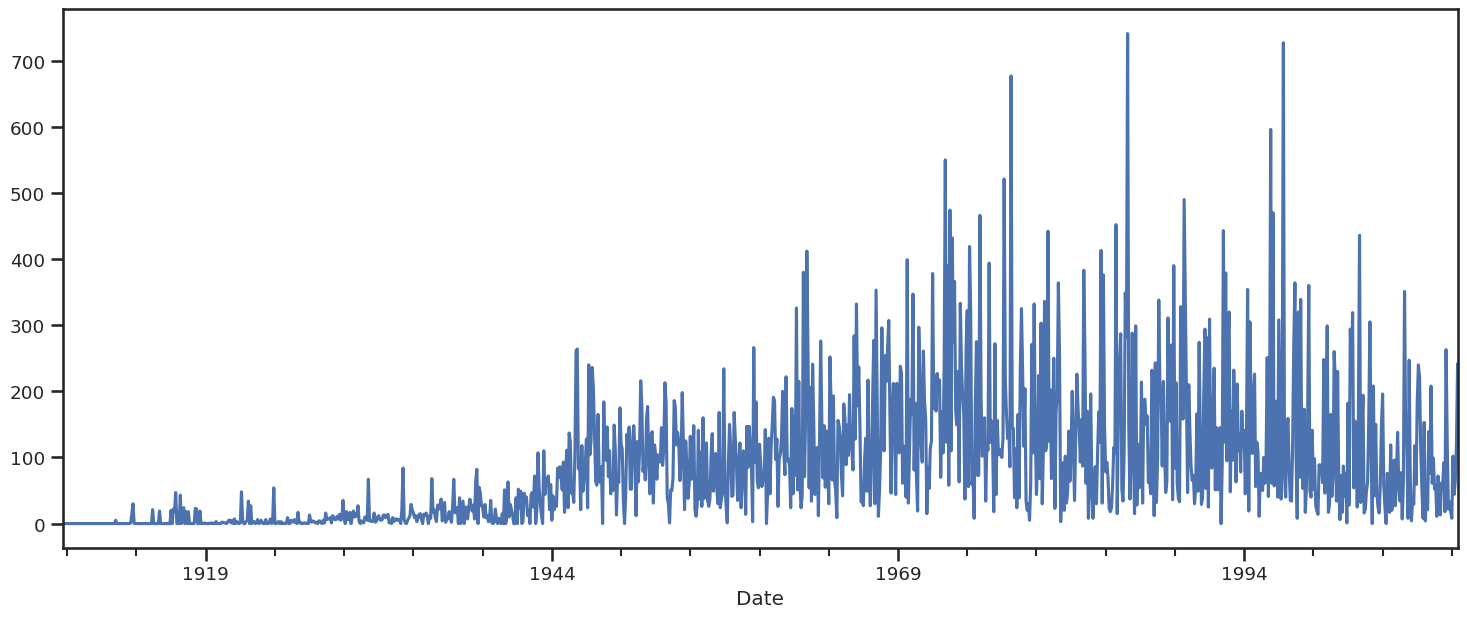

In [61]:
plt.figure(figsize=(18,7))
df_monthly.Fatalities.plot();

In [8]:
df_monthly.rolling(3).mean()

Fatalities
Date                  
1908-09-30         NaN
1908-10-31         NaN
1908-11-30    0.333333
1908-12-31    0.000000
1909-01-31    0.000000
...                ...
2009-02-28   42.666667
2009-03-31   51.333333
2009-04-30   70.333333
2009-05-31   76.333333
2009-06-30  142.333333

[1210 rows x 1 columns]

In [19]:
@interact(window_size=(12,212,12))
def rolling_mean(window_size):
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot()
  plt.show()

interactive(children=(IntSlider(value=108, description='window_size', max=212, min=12, step=12), Output()), _d…